In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-dst-scoring/sample_submission.csv
/kaggle/input/sf-dst-scoring/train.csv
/kaggle/input/sf-dst-scoring/test.csv


In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Посмотрим на данные


In [3]:
path = '/kaggle/input/sf-dst-scoring/'

In [4]:
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')
sample = pd.read_csv(path+'sample_submission.csv')

In [5]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [6]:
train.head(10)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0
5,41415,18FEB2014,SCH,M,27,Y,N,0,1,-2.032257,0,50,1,1,15000,2,3,N,0
6,28436,04FEB2014,SCH,M,39,N,N,0,0,-2.225004,0,60,1,2,28000,1,1,N,0
7,68769,17MAR2014,SCH,F,39,N,N,0,0,-1.522739,1,50,2,3,45000,3,3,N,0
8,38424,14FEB2014,SCH,F,50,Y,N,1,0,-1.676061,0,50,1,1,30000,1,4,N,0
9,4496,10JAN2014,UGR,F,54,N,N,0,0,-2.695176,1,50,2,3,24000,1,3,N,0


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

In [8]:
test.head(10)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
0,74835,22MAR2014,GRD,M,29,Y,Y,0,0,-2.271884,3,50,1,2,50000,1,4,N
1,17527,24JAN2014,SCH,F,39,N,N,5,0,-1.504999,2,50,1,2,5000,4,3,N
2,75683,23MAR2014,UGR,M,50,Y,Y,0,0,-1.691339,1,50,1,2,30000,1,3,Y
3,26883,03FEB2014,SCH,M,56,N,N,0,0,-2.374182,1,40,1,2,17000,1,3,N
4,28862,04FEB2014,GRD,F,38,N,N,0,0,-2.487502,0,80,2,3,120000,1,3,N
5,99881,17APR2014,SCH,F,55,N,N,0,0,-1.740224,7,50,3,3,30000,2,1,N
6,26630,02FEB2014,SCH,F,30,N,N,3,0,-1.387847,5,60,1,2,11000,4,3,N
7,79934,28MAR2014,GRD,M,41,Y,Y,0,0,-3.066047,3,60,1,3,80000,4,1,N
8,16605,23JAN2014,GRD,M,34,N,N,0,0,-3.117086,0,80,2,3,5000,1,2,N
9,105449,24APR2014,UGR,M,28,Y,Y,0,0,-2.185172,0,80,2,3,80000,1,3,Y


In [9]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24354 entries, 0 to 24353
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  24354 non-null  int64  
 1   default    24354 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 380.7 KB


In [10]:
sample.head(10)

,client_id,default
0,66799,0.441004
1,25379,0.138092
2,28825,0.373370
3,37530,0.476501
4,4264,0.304640
5,175,0.311599
6,57558,0.584807
7,88407,0.815792
8,79183,0.325037
9,69300,0.094011


Объединим датасеты, обозначив части и включив несуществующую информацию по дефолтам для тестовой выборки

In [11]:
train['IsTrain'] = 1
test['IsTrain'] = 0
test['default'] = 404
data = train.append(test, sort = False).reset_index(drop = True)

In [12]:
data.head(10)


,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,IsTrain
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0,1
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0,1
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0,1
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0,1
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0,1
5,41415,18FEB2014,SCH,M,27,Y,N,0,1,-2.032257,0,50,1,1,15000,2,3,N,0,1
6,28436,04FEB2014,SCH,M,39,N,N,0,0,-2.225004,0,60,1,2,28000,1,1,N,0,1
7,68769,17MAR2014,SCH,F,39,N,N,0,0,-1.522739,1,50,2,3,45000,3,3,N,0,1
8,38424,14FEB2014,SCH,F,50,Y,N,1,0,-1.676061,0,50,1,1,30000,1,4,N,0,1
9,4496,10JAN2014,UGR,F,54,N,N,0,0,-2.695176,1,50,2,3,24000,1,3,N,0,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         109670 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        11

In [14]:
data.isna().sum()

client_id             0
app_date              0
education           478
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
IsTrain               0
dtype: int64

Хм, education имеет пропуски, посмотрим...

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


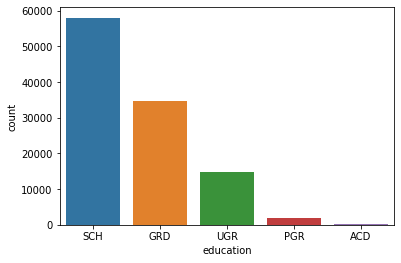

In [15]:
plot = sns.countplot(data['education'])

Предлагаю пропуски просто заполнить значением SCH

In [16]:
data = data.fillna('SCH')
data.isna().sum()

client_id           0
app_date            0
education           0
sex                 0
age                 0
car                 0
car_type            0
decline_app_cnt     0
good_work           0
score_bki           0
bki_request_cnt     0
region_rating       0
home_address        0
work_address        0
income              0
sna                 0
first_time          0
foreign_passport    0
default             0
IsTrain             0
dtype: int64

Теперь все чисто, можно работать

**Выделим численные, категориальные и бинарные признаки**

In [17]:
num_cols = ['age','decline_app_cnt','score_bki','income','bki_request_cnt','region_rating'] 
cat_cols = ['education','work_address','home_address','sna','first_time'] 
bin_cols = ['sex','car','car_type','good_work','foreign_passport'] 

Работаем с числовыми


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


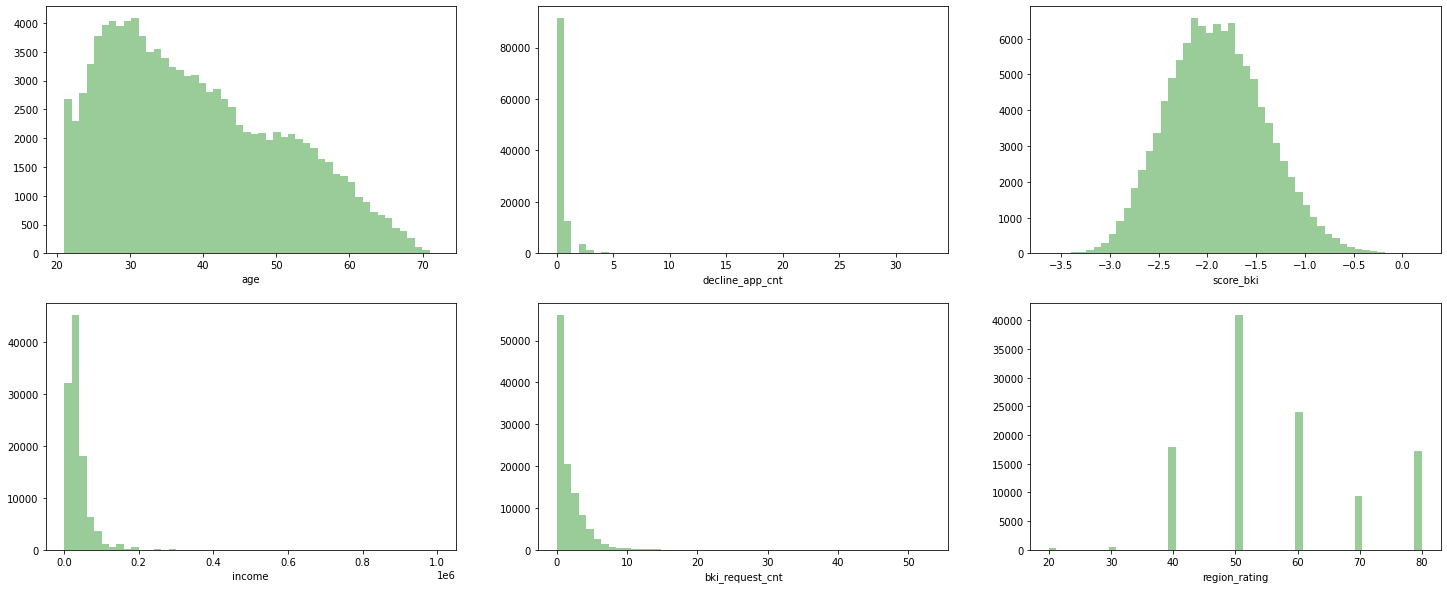

In [18]:
fig, axes = plt.subplots(2 , 3, figsize=(25,10))

for i,var in enumerate(num_cols):
    sns.distplot(data[var], kde=False, ax=axes.flat[i], color="g")

За исключением параметра score_bki, распределения не являются номральными, попробуем прологарифмировать


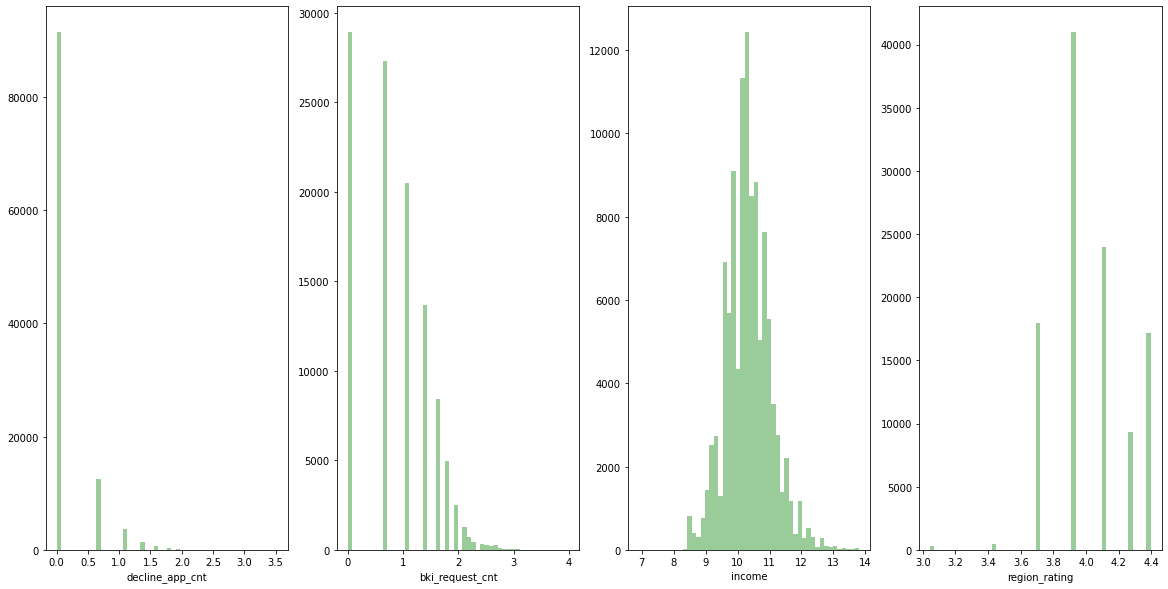

In [19]:
fig, axes = plt.subplots(1,4, figsize = (20, 10))

for i, var in enumerate([ 'decline_app_cnt', 'bki_request_cnt', 'income', 'region_rating']):
    data[var] = np.log(data[var] + 1)
    sns.distplot(data[var], ax = axes.flat[i], kde = False, rug = False, color = 'g')

Работаем с категориальными

<AxesSubplot:>

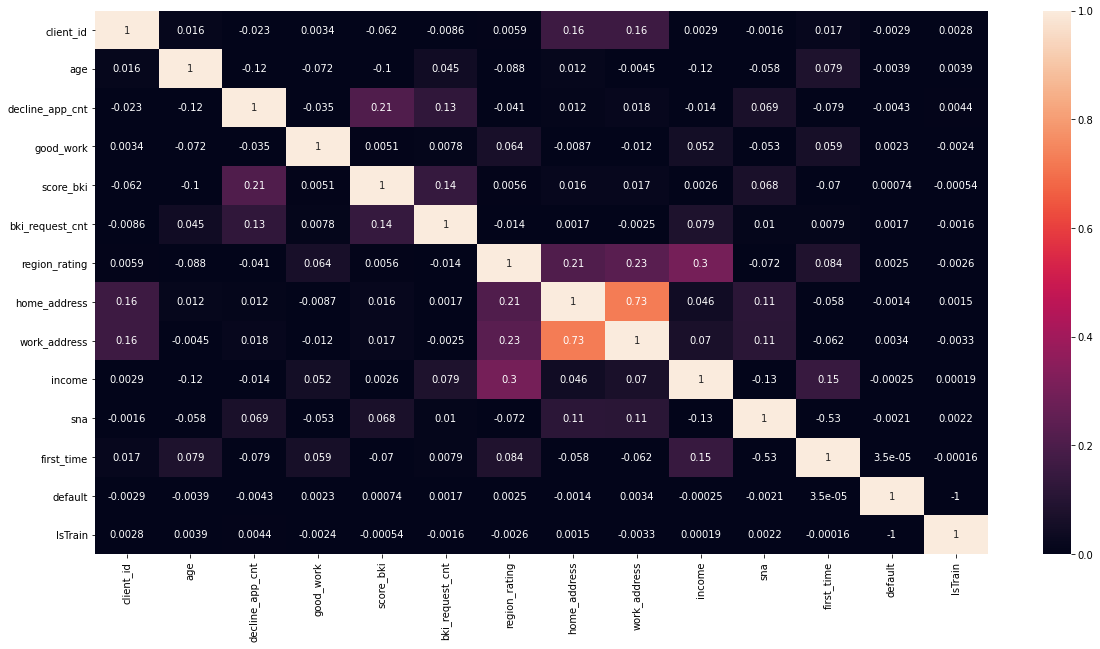

In [20]:
plt.rcParams['figure.figsize'] = (20,10)
sns.heatmap(data.corr(), vmin=0, vmax=1, annot = True)

Ничего экстраординарного нет, приступаем к feature engineering


In [21]:
data

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,IsTrain
0,25905,01FEB2014,SCH,M,62,Y,Y,0.000000,0,-2.008753,0.693147,3.931826,1,2,9.798183,4,1,N,0,1
1,63161,12MAR2014,SCH,F,59,N,N,0.000000,0,-1.532276,1.386294,3.931826,2,3,9.852247,4,1,N,0,1
2,25887,01FEB2014,SCH,M,25,Y,N,1.098612,0,-1.408142,0.693147,4.394449,1,2,10.308986,1,4,Y,0,1
3,16222,23JAN2014,SCH,F,53,N,N,0.000000,0,-2.057471,1.098612,3.931826,2,3,9.210440,1,3,N,0,1
4,101655,18APR2014,GRD,M,48,N,N,0.000000,1,-1.244723,0.693147,4.110874,2,3,10.308986,1,4,Y,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110143,83775,31MAR2014,SCH,F,37,N,N,0.693147,0,-1.744976,1.386294,3.931826,2,3,9.615872,4,1,N,404,0
110144,106254,25APR2014,GRD,F,64,Y,Y,0.000000,0,-2.293781,1.386294,4.110874,1,2,12.206078,1,4,N,404,0
110145,81852,30MAR2014,GRD,M,31,N,N,1.098612,0,-0.940752,0.693147,3.931826,1,2,11.002117,4,2,N,404,0
110146,1971,07JAN2014,UGR,F,27,N,N,0.693147,0,-1.242392,1.098612,4.394449,2,3,10.308986,1,1,N,404,0


In [22]:
data['mean_income_age'] = data['age'].map(data.groupby('age')['income'].mean())

In [23]:
data['mean_income_region'] = data['region_rating'].map(data.groupby('region_rating')['income'].mean())

In [24]:
data['app_date'] = pd.to_datetime(data.app_date)
data['app_date'] = data['app_date'].apply(lambda x: (x - data['app_date'].min()).days)

In [25]:
data[num_cols] = pd.DataFrame(StandardScaler().fit_transform(df[num_cols]), columns = df[num_cols].columns)

NameError: name 'df' is not defined

In [ ]:
data = pd.get_dummies(data, prefix=cat_cols, columns=cat_cols)


In [ ]:
data.loc[data['sex'] == 'M', 'sex'] = 1
data.loc[data['sex'] == 'F', 'sex'] = 0
data.loc[data['car'] == 'Y', 'car'] = 1
data.loc[data['car'] == 'N', 'car'] = 0
data.loc[data['car_type'] == 'Y', 'car_type'] = 1
data.loc[data['car_type'] == 'N', 'car_type'] = 0
data.loc[data['foreign_passport'] == 'Y', 'foreign_passport'] = 1
data.loc[data['foreign_passport'] == 'N', 'foreign_passport'] = 0

In [ ]:
data

Можно начинать делать модель


In [ ]:
data_train = data[data['IsTrain'] == 1].drop(['IsTrain','client_id'], axis=1)
data_test = data[data['IsTrain'] == 0].drop(['IsTrain','client_id'], axis=1)

In [ ]:
X = data_train.drop(['default'], axis=1).values
Y = data_train['default'].values 


In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
model = LogisticRegression(max_iter = 1000)

In [ ]:
model.fit(X_train, Y_train)
y_pred = model.predict(X_valid)

**ROC AUC**

In [ ]:
probs = model.predict_proba(X_valid)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(Y_valid, probs)
roc_auc = roc_auc_score(Y_valid, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
print('accuracy_score:',accuracy_score(Y_valid,y_pred))
print('precision_score:',precision_score(Y_valid,y_pred))
print('recall_score:',recall_score(Y_valid,y_pred))
print('f1_score:',f1_score(Y_valid,y_pred))

In [ ]:
sample

In [ ]:
data_test

In [ ]:

y_pred = model.predict_proba(data_test.drop('default', axis = 1))
result = pd.DataFrame(data={'client_id':test['client_id'], 'default':y_pred[:,1]})

In [ ]:
result

In [ ]:
result.to_csv('submission_for_credit.csv', index=False)